# Packt website scraping (the free book section )

In [65]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import re
from bs4 import BeautifulSoup as bs
import requests
from urllib.request import urlopen
from IPython.display import Image as ig

# Web_scraping

In [3]:
url = "https://www.packtpub.com/free-learning" 
headers = {"User-Agent": "Mozilla/5.0"}

In [4]:
res = requests.get(url, headers=headers)
soup = bs(res.text, "html.parser")

In [6]:
#getting titles of books
titles = soup.find_all("span" , {"class":"card__title"})
titles[0].get_text().strip()

'Responsive Web Design with HTML5 and CSS3, Second Edition'

In [7]:
ntitles =[]
for x in range(len(titles)) :
    d=titles[x].get_text().strip()
    ntitles.append(d)

In [8]:
#getting number of pages 
pages_no = soup.find_all('span',{'class':'card__pages'})
pages_no[0].get_text().strip()

'312 Pages'

In [9]:
page_number = []
for x in range(len(pages_no)):
    y = pages_no[x].get_text().strip()
    page_number.append(y)

In [11]:
#getting the date of releasing
releasing_date = soup.find_all('span',{'class':'card__date'})
releasing_date[0].get_text().strip()

'Aug 2015'

In [12]:
RelDate = []
for x in range(len(releasing_date)) :
    d = releasing_date[x].get_text().strip()
    RelDate.append(d)

In [14]:
#getting authors name
author=soup.find_all('span',{'class':'card__author'})
author[0].get_text().strip()


'By Ben Frain'

In [15]:
a=[]
for x in range(len(author)) :
    y= author[x].get_text().strip()
    a.append(y)

In [17]:
#adding all the data to a CSV file 
data = {
    'book_name': ntitles,
    'page_number': page_number,
    'release_date': RelDate,
    'author': a
} 
df = pd.DataFrame(data)
df.to_csv('books_data.csv', index=False, encoding='utf-8')

# Exploring

In [18]:
df

,book_name,page_number,release_date,author
0,"Responsive Web Design with HTML5 and CSS3, Sec...",312 Pages,Aug 2015,By Ben Frain
1,Extreme C,822 Pages,Oct 2019,By Kamran Amini
2,Mastering Kubernetes - Second Edition,468 Pages,Apr 2018,By Gigi Sayfan
3,Learn Kali Linux 2019,550 Pages,Nov 2019,By Joshua Crumbaugh\n ...
4,AI Crash Course,360 Pages,Nov 2019,By Hadelin de Ponteves
5,Learn Power BI,362 Pages,Sep 2019,By Greg Deckler
6,Learn Python Programming - Second Edition,508 Pages,Jun 2018,By Romano
7,Blockchain By Example,528 Pages,Nov 2018,By Badr\n ...
8,Docker Cookbook - Second Edition,352 Pages,Aug 2018,By Cochrane\n ...
9,Linux Kernel Programming Part 2 - Char Device ...,452 Pages,Mar 2021,By Kaiwan N. Billimoria


In [2]:
df = pd.read_csv('books_data.csv')

In [3]:
df.head(10)

,book_name,page_number,release_date,author
0,"Responsive Web Design with HTML5 and CSS3, Sec...",312 Pages,Aug 2015,By Ben Frain
1,Extreme C,822 Pages,Oct 2019,By Kamran Amini
2,Mastering Kubernetes - Second Edition,468 Pages,Apr 2018,By Gigi Sayfan
3,Learn Kali Linux 2019,550 Pages,Nov 2019,By Joshua Crumbaugh\n ...
4,AI Crash Course,360 Pages,Nov 2019,By Hadelin de Ponteves
5,Learn Power BI,362 Pages,Sep 2019,By Greg Deckler
6,Learn Python Programming - Second Edition,508 Pages,Jun 2018,By Romano
7,Blockchain By Example,528 Pages,Nov 2018,By Badr\n ...
8,Docker Cookbook - Second Edition,352 Pages,Aug 2018,By Cochrane\n ...
9,Linux Kernel Programming Part 2 - Char Device ...,452 Pages,Mar 2021,By Kaiwan N. Billimoria


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   book_name     31 non-null     object
 1   page_number   27 non-null     object
 2   release_date  31 non-null     object
 3   author        31 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


## Conclusion : we have missing vlaues in the page number and it's data type unfortunatly is object and we need to remove the word 'page' from it and  it should be numerical, and we need to change the releasing date (data type).

# Data_preprocessing

In [5]:
# changing the page_number format and extracting only the numbers
df['page_number'] = df['page_number'].str.extract(r'(\d+)').astype(float)

In [6]:
df['page_number'].describe()

count     27.000000
mean     527.333333
std      151.762973
min      312.000000
25%      398.000000
50%      528.000000
75%      607.000000
max      824.000000
Name: page_number, dtype: float64

<Axes: >

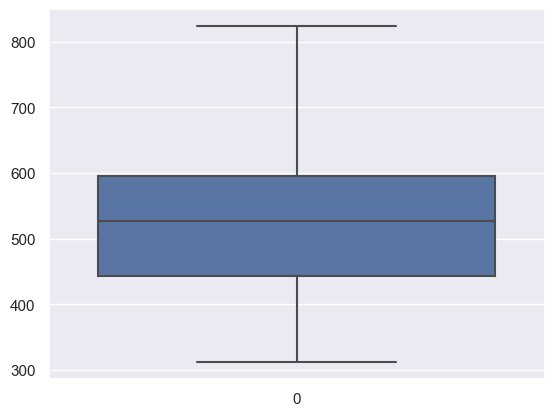

In [68]:
 sns.boxplot(df['page_number'])

In [8]:
df['page_number'] = df['page_number'].fillna(df['page_number'].mean()).round(1)

In [9]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [10]:
df['release_year'] = df['release_date'].dt.year

In [11]:
df = df.drop('release_date' ,axis=1)

In [12]:
df['author'] = df['author'].str.replace(r'\s+',' ',regex=True).str.replace('By', '')

In [13]:
def books_classification(x):
    if x <=350:
        return 'small book'
    else:
        return 'large book'

In [14]:
df['book_size'] = df['page_number'].apply(books_classification)

# Vizualising 

In [17]:
books_count = df['book_size'].value_counts().reset_index()
books_count.columns=['book_size' , 'count']

Text(0, 0.5, 'books_number')

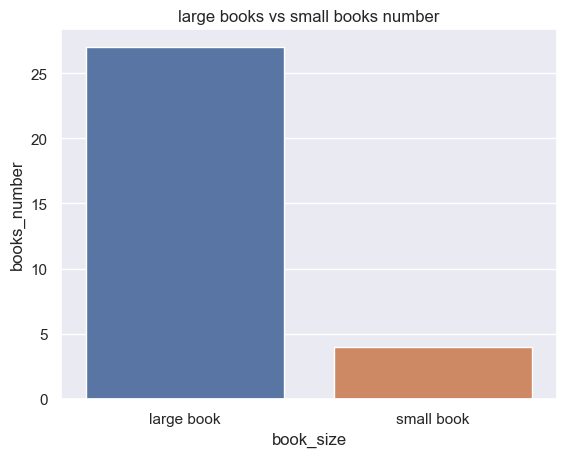

In [67]:
plt.title('large books vs small books number')
sns.barplot(data = books_count , x='book_size' , y='count')
plt.ylabel('books_number')

In [1]:
books_count

NameError: name 'books_count' is not defined

## Conclusion : so the large books is 575% more than small books.


In [31]:
#books over time 
books_over_time = df.groupby(df['release_year'])['book_name'].count().reset_index()
books_over_time

,release_year,book_name
0,2015,1
1,2018,7
2,2019,16
3,2020,6
4,2021,1


Text(0, 0.5, 'books_number')

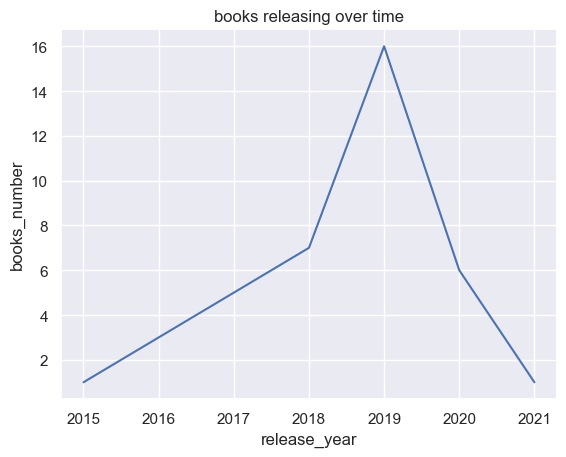

In [66]:
plt.title('books releasing over time')
sns.lineplot(data=books_over_time , x='release_year' , y='book_name')
plt.grid(True)
plt.ylabel('books_number')

## Conclusion : the highest year in releasing books is 2019.

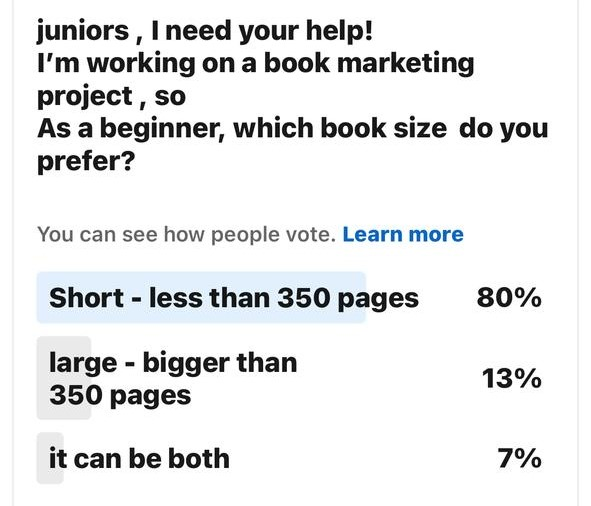

In [69]:
ig("books_voting.png")

## Conclusion : According to a LinkedIn vote, 80% of juniors showed a preference for small books over large books.

# Conclusion

## "Juniors or beginners usually prefer free books more than seniors or experienced employees. This suggests that, as a website that sells books, we should create a hook to attract beginners and encourage them to buy more. One effective strategy is to increase the percentage of small books compared to large ones. Small books give beginners a sense of accomplishment when they finish reading, which motivates them to read more and eventually purchase additional books. On the other hand, large books may feel overwhelming, making beginners less likely to start or finish them. This can discourage them from engaging with the website and may result in fewer sales."